## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Question:

### How did the disease spread within the provinces over time? (Descriptive / Exploratory)

## Reading Data - Infections over Time per Province

#### [Dataset Description](https://www.kaggle.com/kimjihoo/ds4c-what-is-this-dataset-detailed-description)

##### Quick Data Exploration

In [8]:
infections_prov_time = pd.read_csv('../data/TimeProvince.csv')

In [9]:
infections_prov_time.head()

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0


In [10]:
infections_prov_time.describe()

,time,confirmed,released,deceased
count,1564.000000,1564.000000,1564.000000,1564.000000
mean,7.304348,290.842711,126.927749,4.335038
std,7.972246,1112.384174,642.360989,19.190269
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,14.000000,2.000000,0.000000
75%,16.000000,72.250000,21.000000,0.000000
max,16.000000,6833.000000,5769.000000,163.000000


In [11]:
infections_prov_time[infections_prov_time['province'] == 'Seoul'].sort_values(['province','date']).head(20)

,date,time,province,confirmed,released,deceased
0,2020-01-20,16,Seoul,0,0,0
17,2020-01-21,16,Seoul,0,0,0
34,2020-01-22,16,Seoul,0,0,0
51,2020-01-23,16,Seoul,0,0,0
68,2020-01-24,16,Seoul,0,0,0
85,2020-01-25,16,Seoul,0,0,0
102,2020-01-26,16,Seoul,0,0,0
119,2020-01-27,16,Seoul,1,0,0
136,2020-01-28,16,Seoul,1,0,0
153,2020-01-29,16,Seoul,1,0,0


#### Munging data to compute the number of infections per day since 1st infection day

In [17]:
infections_prov_time_clean = infections_prov_time.rename(index=str, columns={'confirmed':'accum_confirmed',
                                                                             'released':'accum_released',
                                                                             'deceased':'accum_deceased'})

infections_prov_time_clean

,date,time,province,accum_confirmed,accum_released,accum_deceased
0,2020-01-20,16,Seoul,0,0,0
1,2020-01-20,16,Busan,0,0,0
2,2020-01-20,16,Daegu,0,0,0
3,2020-01-20,16,Incheon,1,0,0
4,2020-01-20,16,Gwangju,0,0,0
...,...,...,...,...,...,...
1559,2020-04-20,0,Jeollabuk-do,17,9,0
1560,2020-04-20,0,Jeollanam-do,15,8,0
1561,2020-04-20,0,Gyeongsangbuk-do,1361,1064,51
1562,2020-04-20,0,Gyeongsangnam-do,116,87,0


In [18]:
day_one_per_province = infections_prov_time_clean[infections_prov_time_clean['accum_confirmed'] > 0] \
                                                  .sort_values(['province','date']) \
                                                  .groupby(['province']) \
                                                  .head(1) \
                                                  .reset_index() \
                                                  .filter(['province','date']) \
                                                  .assign(days_since_day1 = 1)

day_one_per_province

,province,date,days_since_day1
0,Busan,2020-02-20,1
1,Chungcheongbuk-do,2020-02-21,1
2,Chungcheongnam-do,2020-02-21,1
3,Daegu,2020-02-18,1
4,Daejeon,2020-02-22,1
5,Gangwon-do,2020-02-22,1
6,Gwangju,2020-02-04,1
7,Gyeonggi-do,2020-01-24,1
8,Gyeongsangbuk-do,2020-02-19,1
9,Gyeongsangnam-do,2020-02-19,1


In [19]:
infections_since_day1 = pd.merge(infections_prov_time_clean,day_one_per_province, how='left')
infections_since_day1['after_day1'] = infections_since_day1.groupby(['province']).days_since_day1.transform(lambda x : x.ffill()).fillna(0)
infections_since_day1 = infections_since_day1[infections_since_day1['after_day1'] == 1]
infections_since_day1['days_since_day1'] = infections_since_day1.groupby(['province']).after_day1.transform(lambda x : x.cumsum()).fillna(0)
infections_since_day1 = infections_since_day1.drop(columns=['after_day1'], axis=1)
infections_since_day1

,date,time,province,accum_confirmed,accum_released,accum_deceased,days_since_day1
3,2020-01-20,16,Incheon,1,0,0,1.0
20,2020-01-21,16,Incheon,1,0,0,2.0
37,2020-01-22,16,Incheon,1,0,0,3.0
54,2020-01-23,16,Incheon,1,0,0,4.0
71,2020-01-24,16,Incheon,1,0,0,5.0
...,...,...,...,...,...,...,...
1559,2020-04-20,0,Jeollabuk-do,17,9,0,81.0
1560,2020-04-20,0,Jeollanam-do,15,8,0,59.0
1561,2020-04-20,0,Gyeongsangbuk-do,1361,1064,51,62.0
1562,2020-04-20,0,Gyeongsangnam-do,116,87,0,62.0


In [20]:
infections_since_day1.sort_values(['days_since_day1','province'])

,date,time,province,accum_confirmed,accum_released,accum_deceased,days_since_day1
528,2020-02-20,16,Busan,8,0,0,1.0
554,2020-02-21,16,Chungcheongbuk-do,1,0,0,1.0
555,2020-02-21,16,Chungcheongnam-do,1,0,0,1.0
495,2020-02-18,16,Daegu,1,0,0,1.0
566,2020-02-22,16,Daejeon,2,0,0,1.0
...,...,...,...,...,...,...,...
1482,2020-04-16,0,Incheon,88,51,0,88.0
1499,2020-04-17,0,Incheon,89,51,0,89.0
1516,2020-04-18,0,Incheon,90,55,0,90.0
1533,2020-04-19,0,Incheon,91,55,0,91.0


#### Adding population density data to compute proportional rates

In [22]:
province_data = {
    'province': ['Gyeonggi-do', 'Gangwon-do', 'Chungcheongbuk-do', 'Chungcheongnam-do', 'Jeollabuk-do', 'Jeollanam-do', 
    'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Busan', 'Daegu', 'Daejeon', 'Gwangju', 'Incheon', 'Ulsan', 'Seoul', 'Jeju-do', 'Sejong'],
    'population': [12479061, 1518040, 1589377, 2107802, 1834114, 1799044, 2680294, 3334524, 3448737, 2466052, 1538394, 1502881, 2890451, 1166615, 9904312, 605619, 204088],
    'area': [10183.5, 16827.1, 7407.3, 8226.1, 8069.1, 12318.8, 19031.4, 10539.6, 769.6, 883.6, 539.3, 501.2, 1062.6, 1060.8, 605.2, 1849.1, 464.9]
}

provinces = pd.DataFrame(data = province_data, columns = ['province', 'population', 'area'])
provinces['pop_density'] = provinces['population'] / provinces['area']

In [23]:
provinces

,province,population,area,pop_density
0,Gyeonggi-do,12479061,10183.5,1225.419649
1,Gangwon-do,1518040,16827.1,90.214000
2,Chungcheongbuk-do,1589377,7407.3,214.569006
3,Chungcheongnam-do,2107802,8226.1,256.233452
4,Jeollabuk-do,1834114,8069.1,227.300938
5,Jeollanam-do,1799044,12318.8,146.040523
6,Gyeongsangbuk-do,2680294,19031.4,140.835356
7,Gyeongsangnam-do,3334524,10539.6,316.380508
8,Busan,3448737,769.6,4481.207121
9,Daegu,2466052,883.6,2790.914441


In [75]:
infections_since_day1_full = pd.merge(infections_since_day1, provinces, how='left')
infections_since_day1_full['accum_confirmed_perc_total_pop'] = 100 * (infections_since_day1_full['accum_confirmed'] / infections_since_day1_full['population'])
infections_since_day1_full

,date,time,province,accum_confirmed,accum_released,accum_deceased,days_since_day1,population,area,pop_density,accum_confirmed_perc_total_pop
0,2020-01-20,16,Incheon,1,0,0,1.0,2890451,1062.6,2720.168455,0.000035
1,2020-01-21,16,Incheon,1,0,0,2.0,2890451,1062.6,2720.168455,0.000035
2,2020-01-22,16,Incheon,1,0,0,3.0,2890451,1062.6,2720.168455,0.000035
3,2020-01-23,16,Incheon,1,0,0,4.0,2890451,1062.6,2720.168455,0.000035
4,2020-01-24,16,Incheon,1,0,0,5.0,2890451,1062.6,2720.168455,0.000035
...,...,...,...,...,...,...,...,...,...,...,...
1141,2020-04-20,0,Jeollabuk-do,17,9,0,81.0,1834114,8069.1,227.300938,0.000927
1142,2020-04-20,0,Jeollanam-do,15,8,0,59.0,1799044,12318.8,146.040523,0.000834
1143,2020-04-20,0,Gyeongsangbuk-do,1361,1064,51,62.0,2680294,19031.4,140.835356,0.050778
1144,2020-04-20,0,Gyeongsangnam-do,116,87,0,62.0,3334524,10539.6,316.380508,0.003479


#### Finding the provinces with higher infection rate (actual numbers and proportional numbers)

In [77]:
total_per_province = infections_since_day1_full.sort_values(['province','date']).groupby('province').tail(1).reset_index()
total_per_province = total_per_province[['date','province','days_since_day1','population','pop_density','accum_confirmed','accum_confirmed_perc_total_pop']]
total_per_province

,date,province,days_since_day1,population,pop_density,accum_confirmed,accum_confirmed_perc_total_pop
0,2020-04-20,Busan,61.0,3448737,4481.207121,132,0.003827
1,2020-04-20,Chungcheongbuk-do,60.0,1589377,214.569006,45,0.002831
2,2020-04-20,Chungcheongnam-do,60.0,2107802,256.233452,141,0.006689
3,2020-04-20,Daegu,63.0,2466052,2790.914441,6833,0.277083
4,2020-04-20,Daejeon,59.0,1538394,2852.575561,39,0.002535
5,2020-04-20,Gangwon-do,59.0,1518040,90.214000,53,0.003491
6,2020-04-20,Gwangju,77.0,1502881,2998.565443,30,0.001996
7,2020-04-20,Gyeonggi-do,88.0,12479061,1225.419649,656,0.005257
8,2020-04-20,Gyeongsangbuk-do,62.0,2680294,140.835356,1361,0.050778
9,2020-04-20,Gyeongsangnam-do,62.0,3334524,316.380508,116,0.003479


In [78]:
province_inf_rate_real_nos = total_per_province.sort_values('accum_confirmed', ascending=False)
province_inf_rate_real_nos

,date,province,days_since_day1,population,pop_density,accum_confirmed,accum_confirmed_perc_total_pop
3,2020-04-20,Daegu,63.0,2466052,2790.914441,6833,0.277083
8,2020-04-20,Gyeongsangbuk-do,62.0,2680294,140.835356,1361,0.050778
7,2020-04-20,Gyeonggi-do,88.0,12479061,1225.419649,656,0.005257
15,2020-04-20,Seoul,85.0,9904312,16365.353602,624,0.006300
2,2020-04-20,Chungcheongnam-do,60.0,2107802,256.233452,141,0.006689
0,2020-04-20,Busan,61.0,3448737,4481.207121,132,0.003827
9,2020-04-20,Gyeongsangnam-do,62.0,3334524,316.380508,116,0.003479
10,2020-04-20,Incheon,92.0,2890451,2720.168455,92,0.003183
5,2020-04-20,Gangwon-do,59.0,1518040,90.214000,53,0.003491
14,2020-04-20,Sejong,59.0,204088,438.993332,46,0.022539


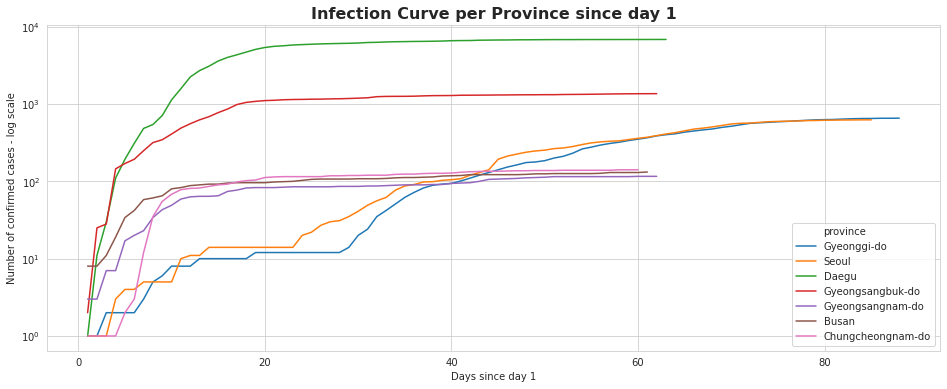

In [96]:
top_infected_provinces_real_nos = province_inf_rate_real_nos.query('accum_confirmed >= 100').province

plt.figure(figsize=(16, 6))
sns.set_style('whitegrid')
p = sns.lineplot(x="days_since_day1",
                 y="accum_confirmed",
                 hue="province",
                 data=infections_since_day1_full[infections_since_day1_full.province.isin(
                     top_infected_provinces_real_nos)]);
p.set_yscale("log");
p.axes.set_title('Infection Curve per Province since day 1', fontsize = 16, weight='bold');
p.set_xlabel('Days since day 1', fontsize = 10);
p.set_ylabel('Number of confirmed cases - log scale', fontsize = 10);

In [80]:
province_inf_rate_prop_nos = total_per_province.sort_values('accum_confirmed_perc_total_pop', ascending=False)
province_inf_rate_prop_nos

,date,province,days_since_day1,population,pop_density,accum_confirmed,accum_confirmed_perc_total_pop
3,2020-04-20,Daegu,63.0,2466052,2790.914441,6833,0.277083
8,2020-04-20,Gyeongsangbuk-do,62.0,2680294,140.835356,1361,0.050778
14,2020-04-20,Sejong,59.0,204088,438.993332,46,0.022539
2,2020-04-20,Chungcheongnam-do,60.0,2107802,256.233452,141,0.006689
15,2020-04-20,Seoul,85.0,9904312,16365.353602,624,0.006300
7,2020-04-20,Gyeonggi-do,88.0,12479061,1225.419649,656,0.005257
0,2020-04-20,Busan,61.0,3448737,4481.207121,132,0.003827
16,2020-04-20,Ulsan,59.0,1166615,1099.750189,43,0.003686
5,2020-04-20,Gangwon-do,59.0,1518040,90.214000,53,0.003491
9,2020-04-20,Gyeongsangnam-do,62.0,3334524,316.380508,116,0.003479


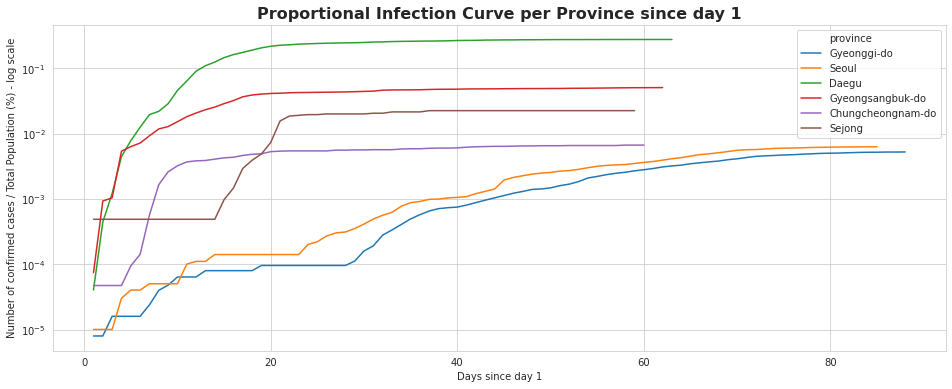

In [95]:
top_infected_provinces_prop_nos = province_inf_rate_prop_nos.query('accum_confirmed_perc_total_pop >= 0.005').province

plt.figure(figsize=(16, 6))
p = sns.lineplot(x="days_since_day1",
                 y="accum_confirmed_perc_total_pop",
                 hue="province",
                 data=infections_since_day1_full[infections_since_day1_full.province.isin(
                     top_infected_provinces_prop_nos)]);
p.set_yscale("log");
p.axes.set_title('Proportional Infection Curve per Province since day 1', fontsize = 16, weight='bold');
p.set_xlabel('Days since day 1', fontsize = 10);
p.set_ylabel('Number of confirmed cases / Total Population (%) - log scale', fontsize = 10);